# ***Mount Google Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import necessary libraries.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# •	**Task 1:** Read/Load the dataset file in our program. By Using Pandas library to complete this task.

In [ ]:
file_path = '/content/drive/MyDrive/Python Final Project/df.xlsx'

data = pd.read_excel(file_path)

print(data.head())

print("\nNumber of Entries in the Dataset:", len(data))


         id diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         21.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# •	**Task 2:** Applying appropriate data cleaning techniques to the dataset to get a clean DataSet.

> Indented block



**Checking the Missing Values**

In [ ]:
zeros_mask = (data == 0)
columns_with_zeros = zeros_mask.any()
columns_containing_zeros = columns_with_zeros[columns_with_zeros].index.tolist()
if columns_containing_zeros:
    print("Columns containing zeros:")
    print(columns_containing_zeros)
else:
    print("No columns contain zeros in the dataset.")

Columns containing zeros:
['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']


**Handeling the Missing values**

In [ ]:
for column in columns_containing_zeros:
     data[column].replace(0, float('nan'), inplace=True)
     mean_value = data[column].mean()
     data[column].fillna(mean_value, inplace=True)

output_path = '/content/drive/MyDrive/Python Final Project/filled_missing_values_in_dataset.xlsx'
data.to_excel(output_path, index=False)
try:
    pd.read_excel(output_path)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")

File saved successfully!


In [ ]:
data=pd.read_excel(output_path)

In [ ]:
zeros_mask = (data == 0)

columns_with_zeros = zeros_mask.any()

columns_containing_zeros = columns_with_zeros[columns_with_zeros].index.tolist()

if columns_containing_zeros:
    print("Columns containing zeros:")
    print(columns_containing_zeros)
else:
    print("No columns contain zeros in the dataset.")

No columns contain zeros in the dataset.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Checking if the Data is in the Wrong Format or not and Fix it**

In [ ]:
print("Data Types:")
print(data.dtypes)

Data Types:
id                           int64
diagnosis                   object
Radius_mean                float64
Texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavit

**Check Duplicate Data in the Dataset**

In [ ]:
duplicate_rows = data[data.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicate rows found.


**Detect Outliers in the Dataset using Scatter Plot**


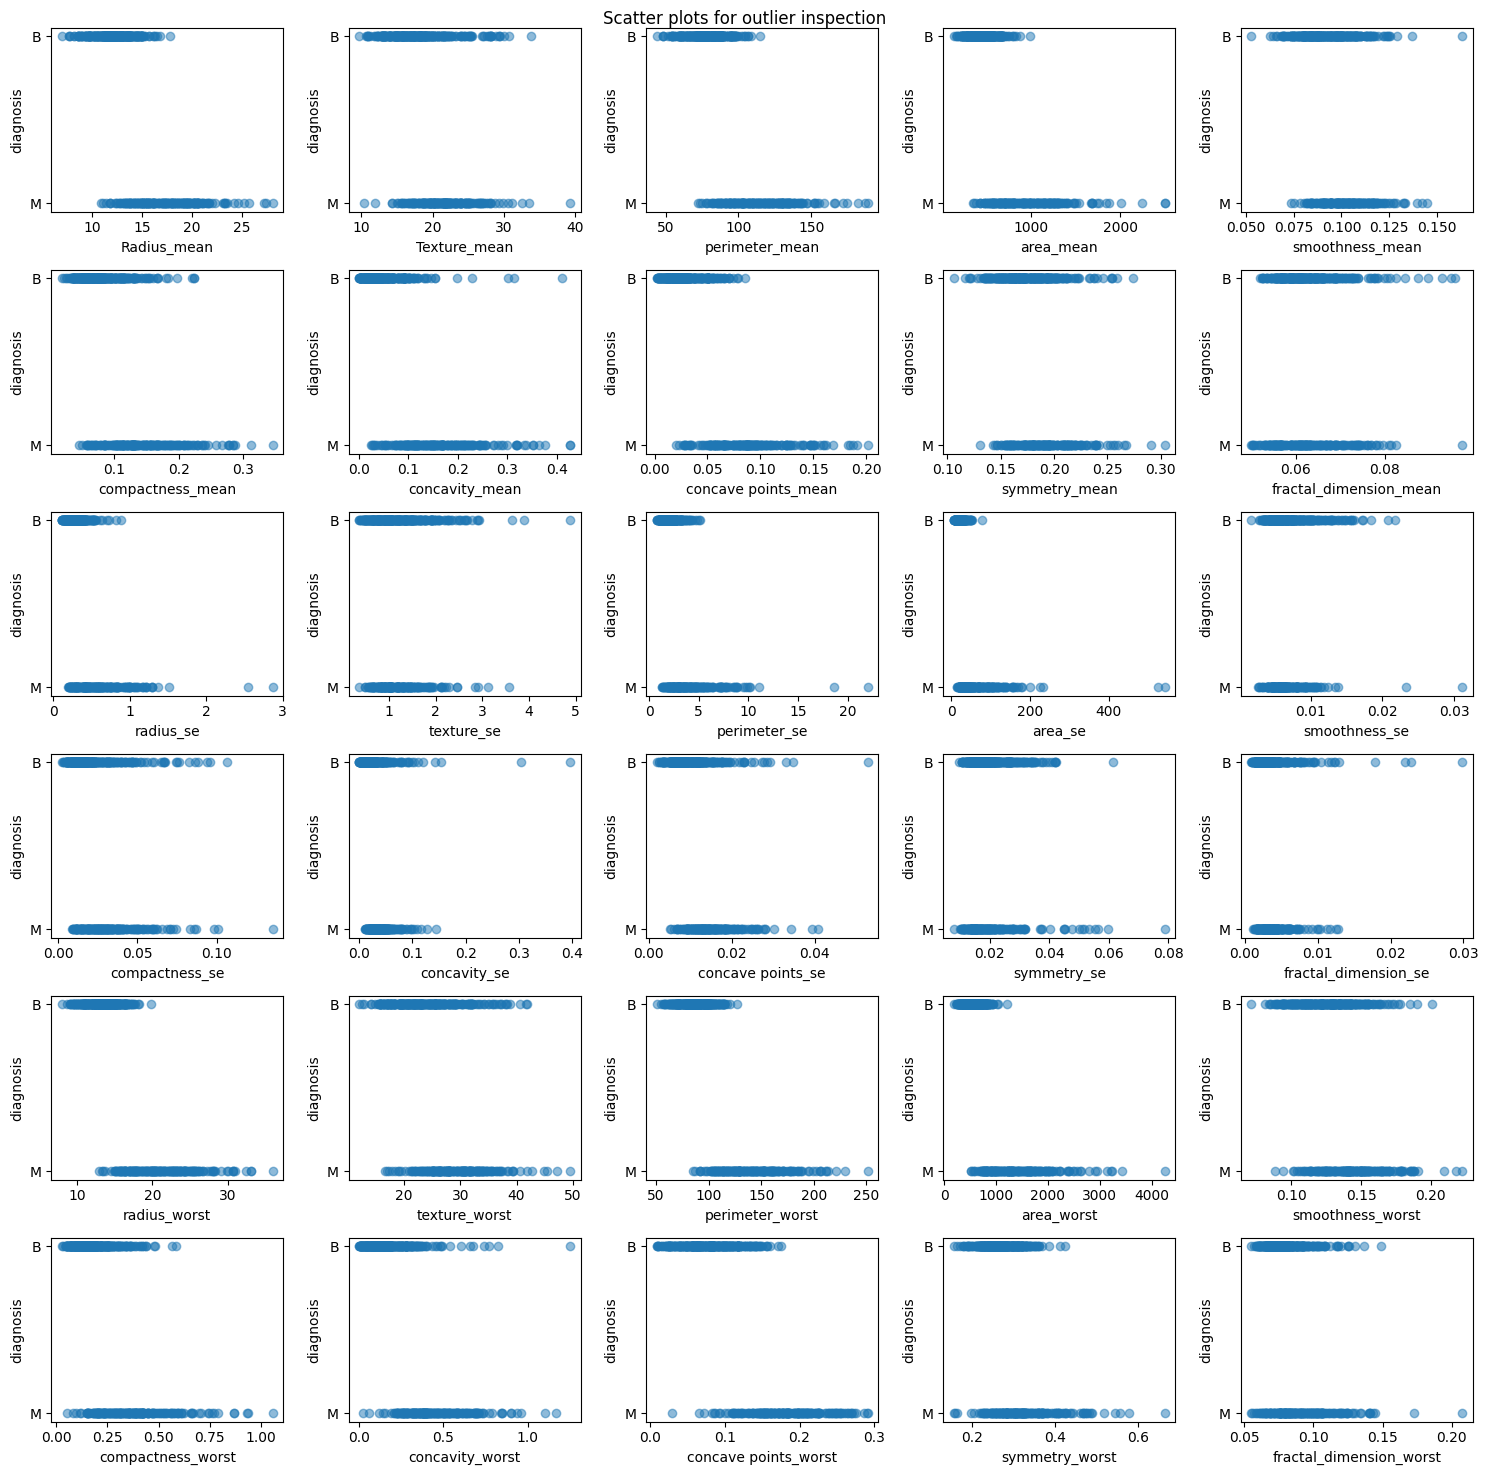

In [ ]:
target_variable = data.columns[1]

numerical_columns = data.select_dtypes(include='number').columns[1:]

num_cols = 5
num_rows = (len(numerical_columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle('Scatter plots for outlier inspection')

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.scatter(data[column], data[target_variable], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel(target_variable)

plt.tight_layout()
plt.show()


**Display the Column Names**

In [ ]:
print(data.columns)

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**Remove the Outliers using Median Value**

In [ ]:
columns_to_replace_outliers = [
    'smoothness_mean', 'concavity_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'concavity_worst', 'fractal_dimension_worst'
]

for column in columns_to_replace_outliers:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = data[column].median()
    data[column] = data[column].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)

output_path = '/content/drive/MyDrive/Python Final Project/filled_missing_values_and_removed_outliers_in_dataset.xlsx'
data.to_excel(output_path, index=False)
try:
    pd.read_excel(output_path)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")


File saved successfully!


# •	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task.

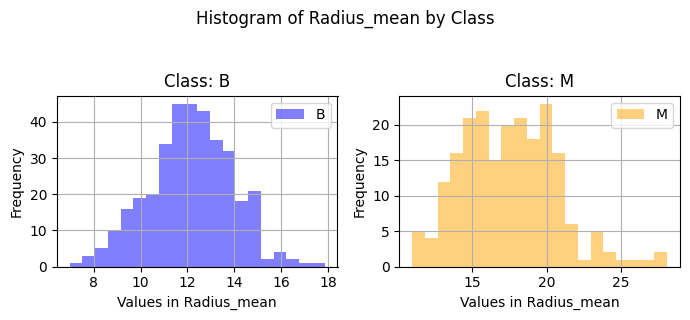

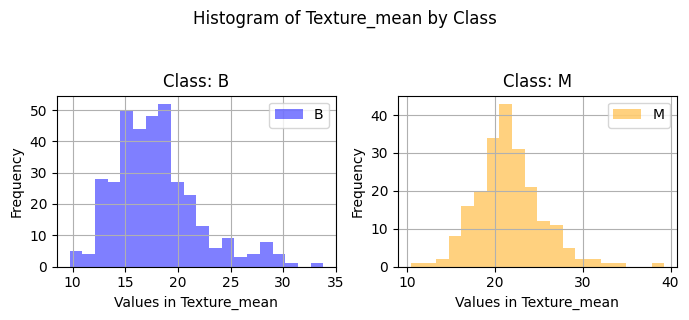

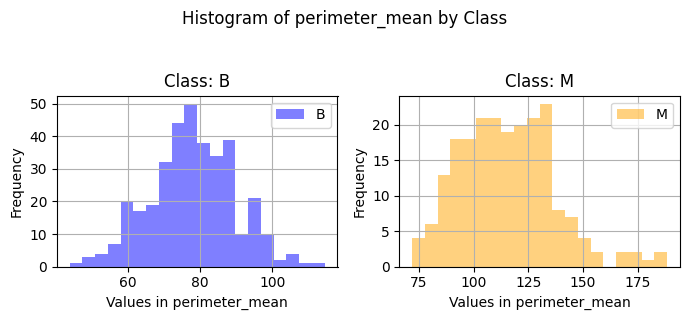

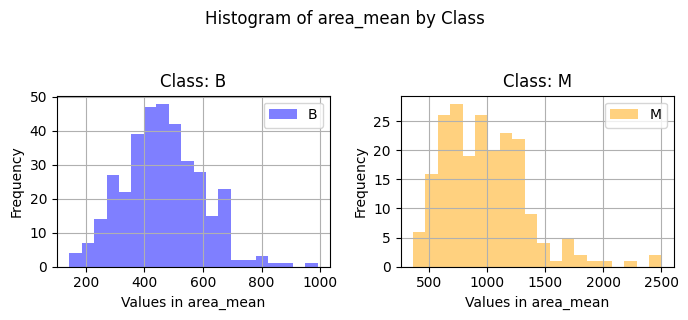

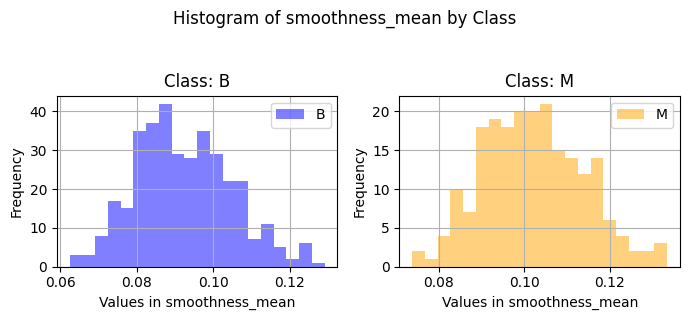

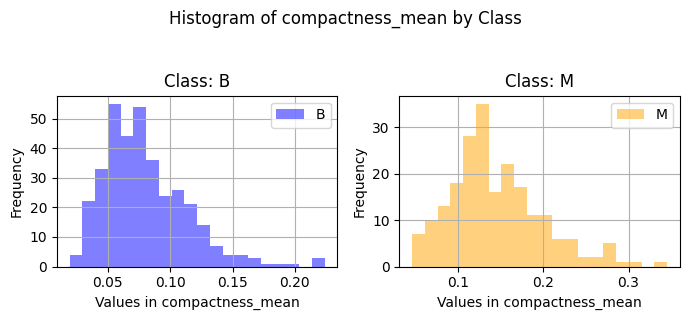

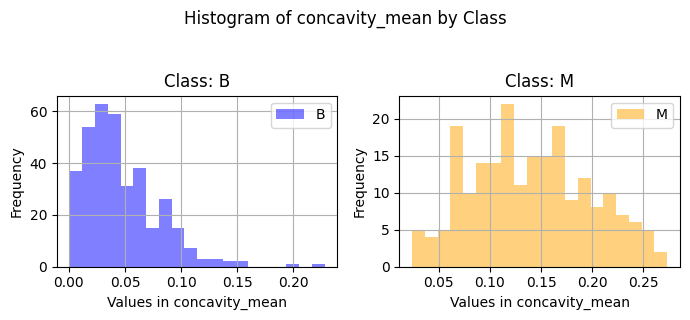

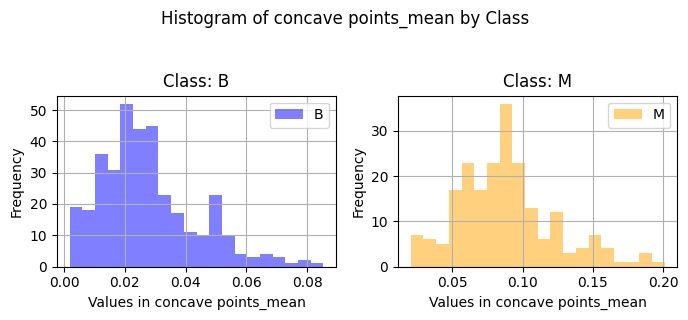

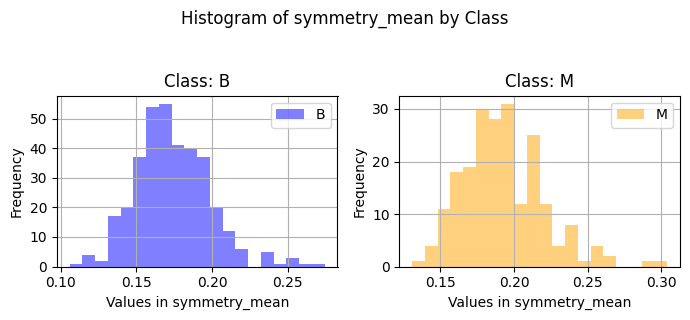

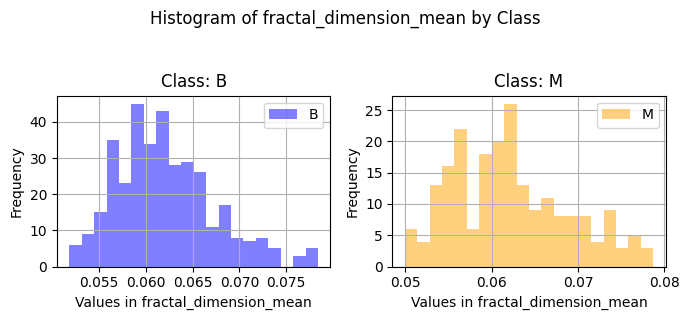

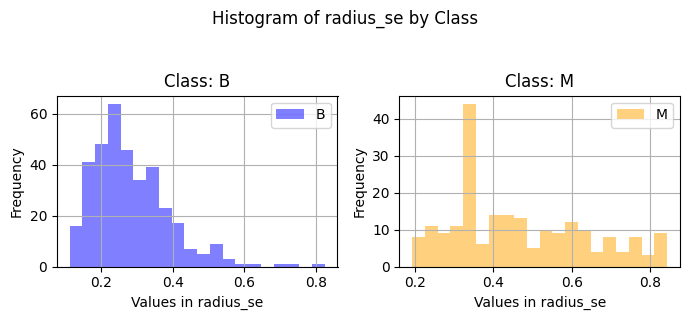

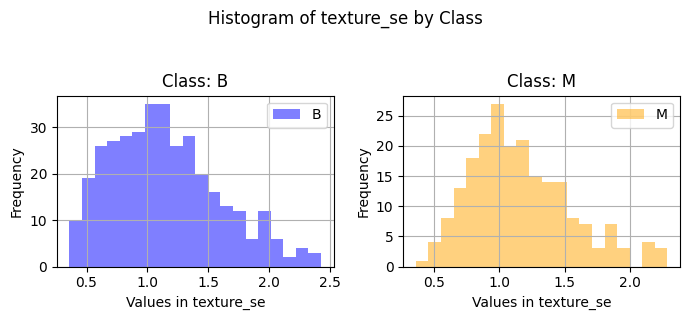

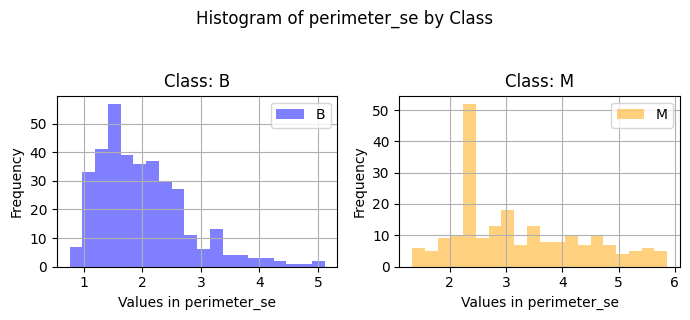

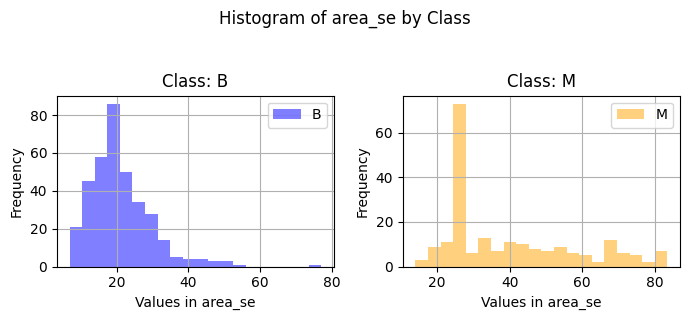

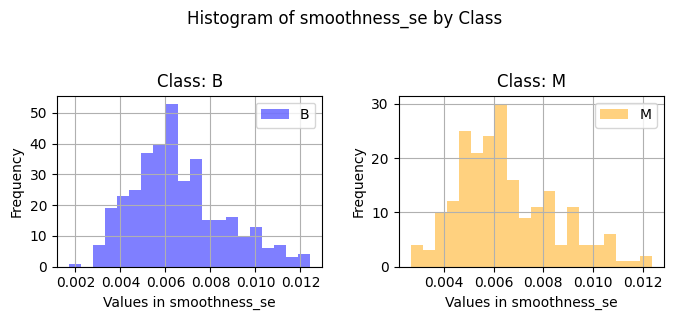

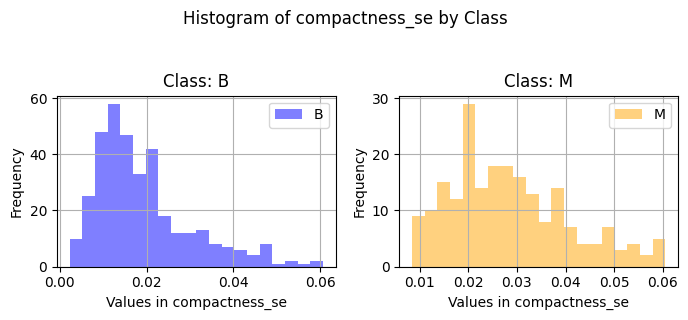

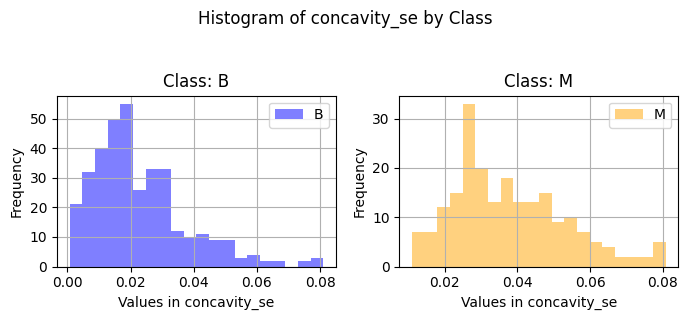

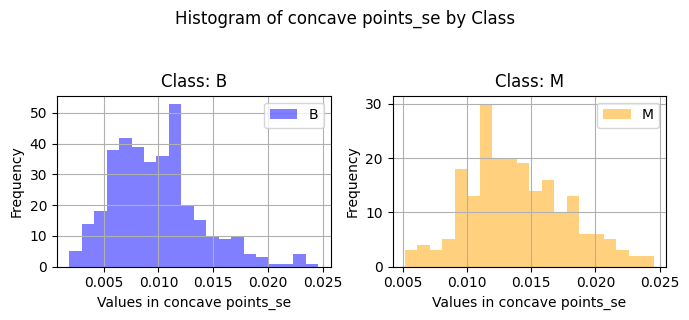

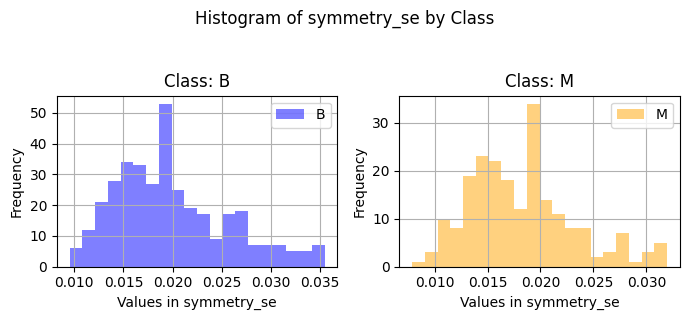

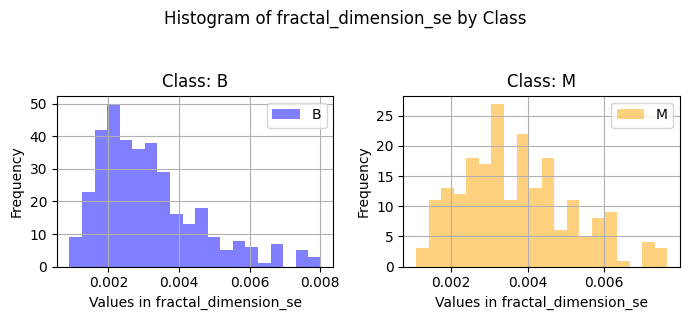

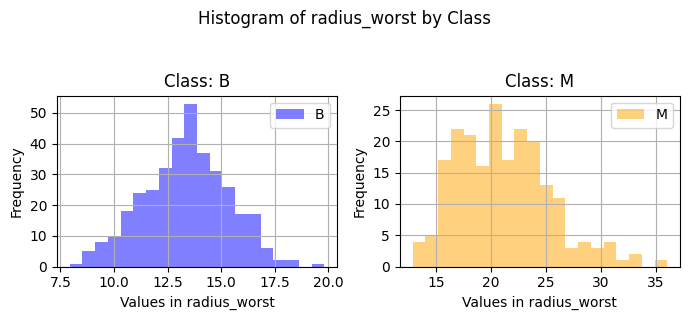

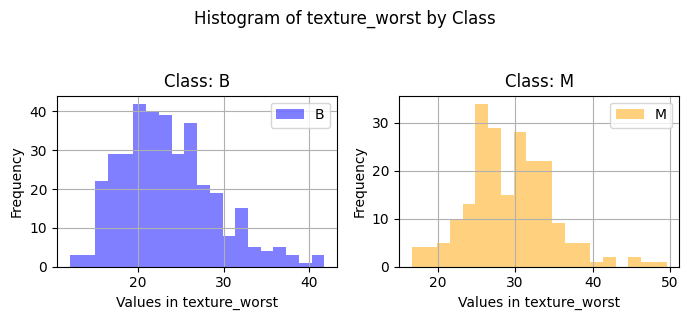

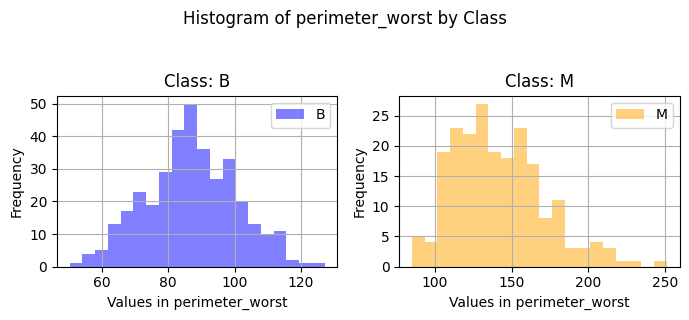

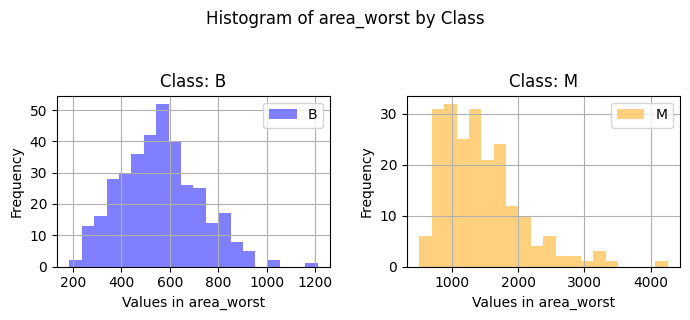

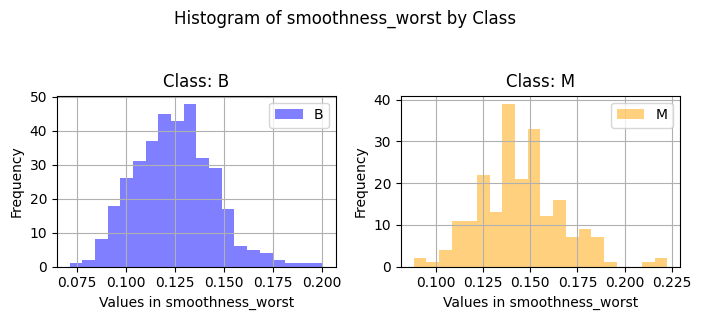

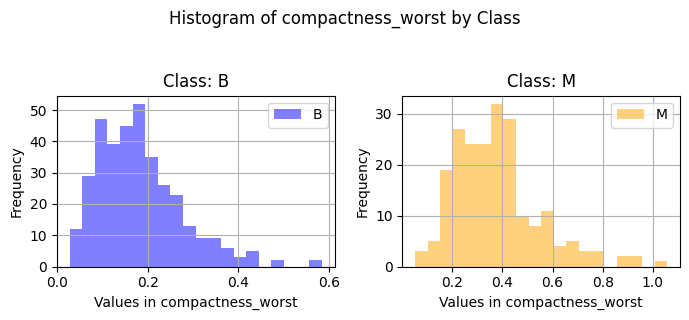

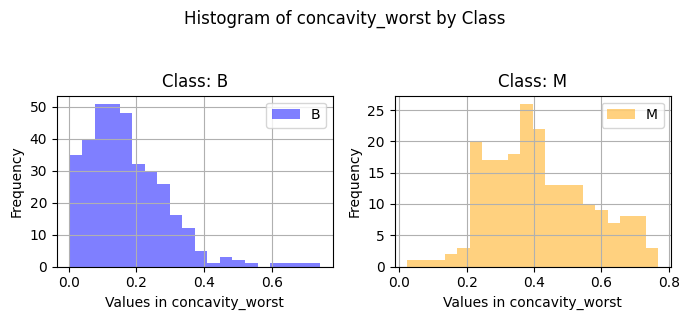

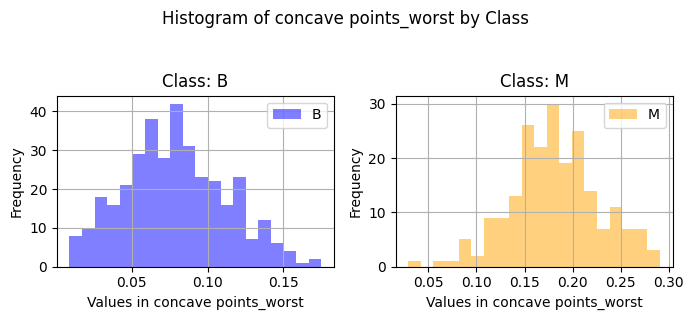

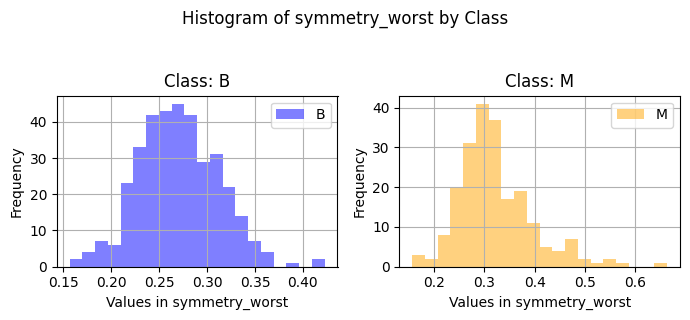

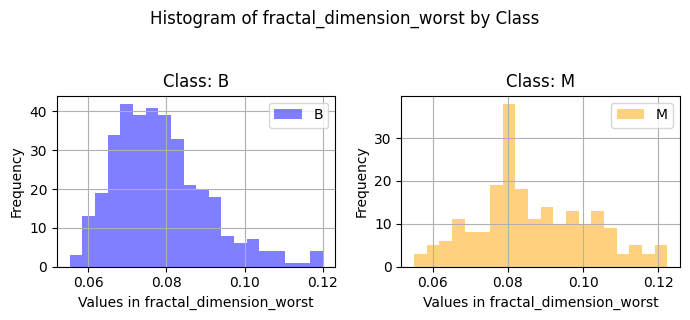

In [ ]:
class_column = data.columns[1]
columns_to_visualize = data.columns[2:]

colors = ['blue', 'orange']

for column in columns_to_visualize:
    fig, axs = plt.subplots(1, 2, figsize=(7, 3))
    fig.suptitle(f'Histogram of {column} by Class', y=1.05)

    for idx, (class_label, group) in enumerate(data.groupby(class_column)):
        ax = axs[idx]

        ax.hist(group[column], bins=20, alpha=0.5, label=str(class_label), color=colors[idx])
        ax.set_xlabel(f'Values in {column}')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Class: {class_label}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


**New Updated Dataset**

In [ ]:
data1=pd.read_excel(output_path)


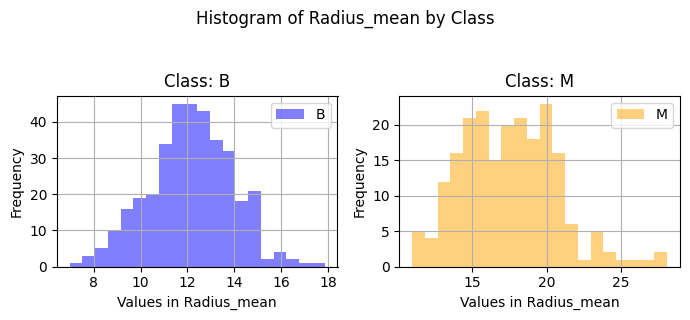

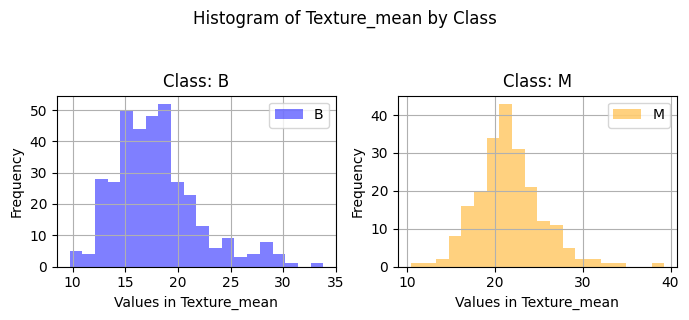

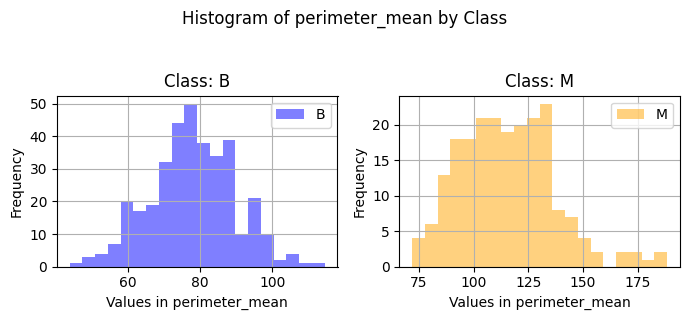

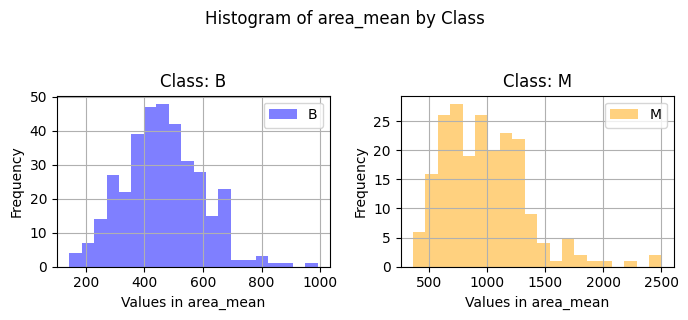

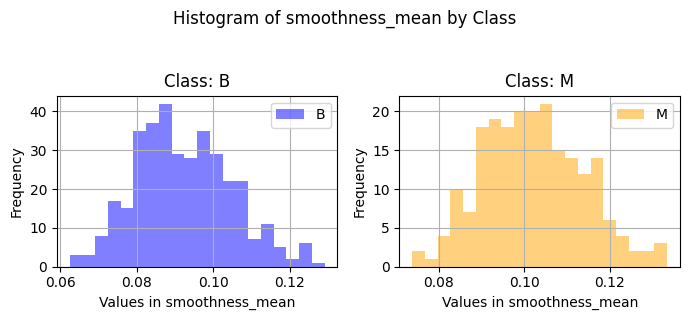

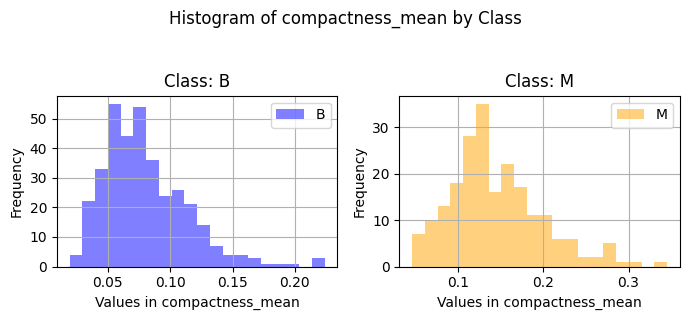

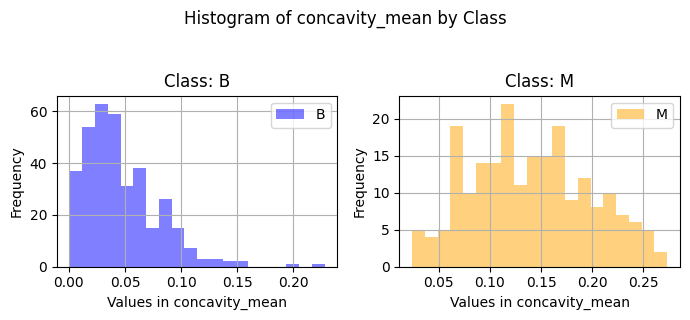

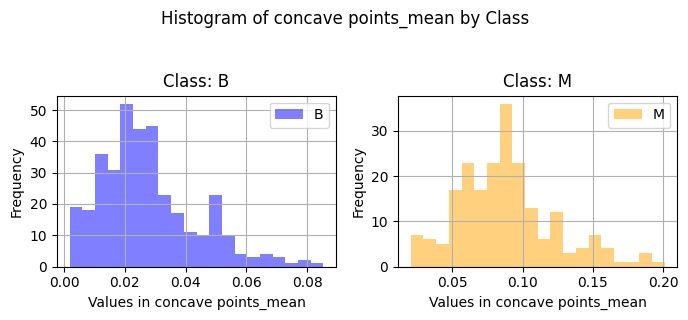

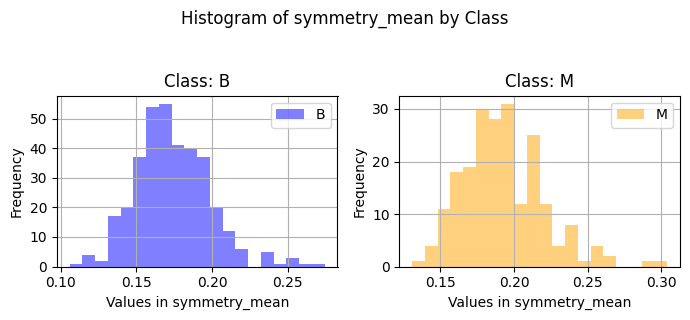

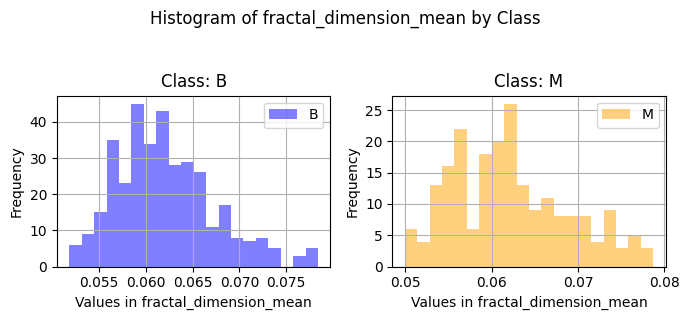

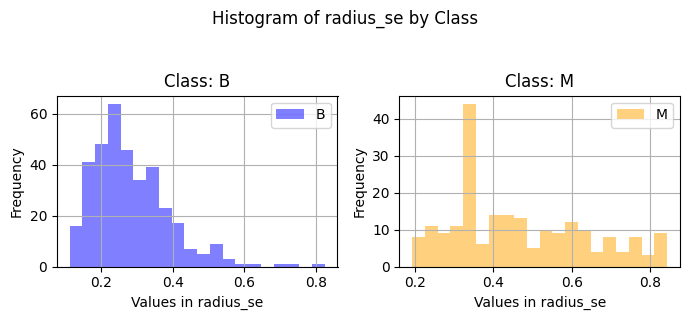

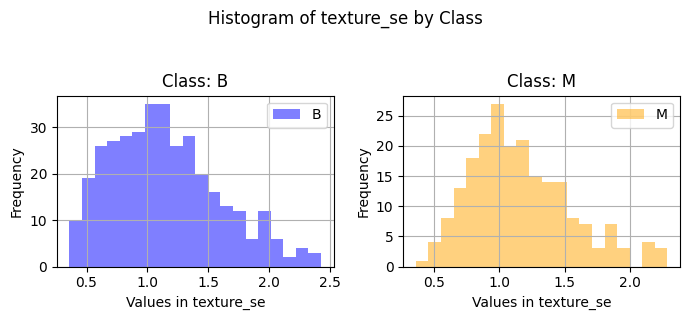

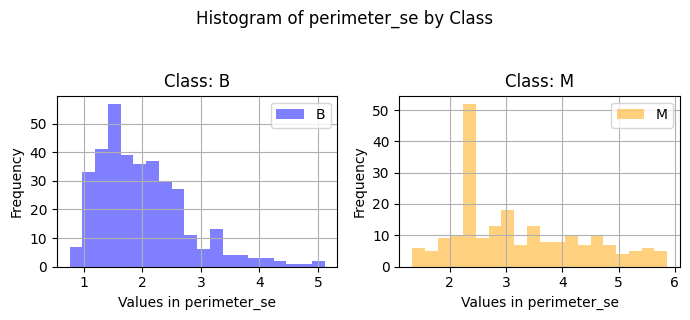

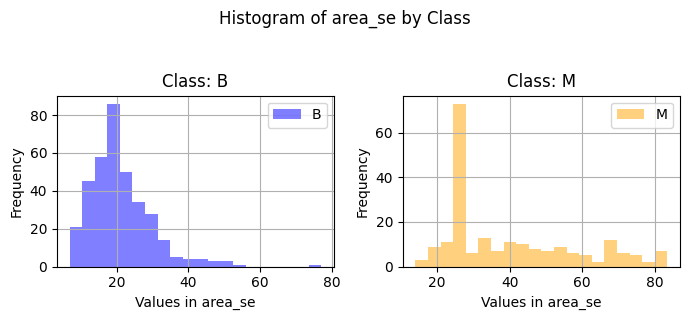

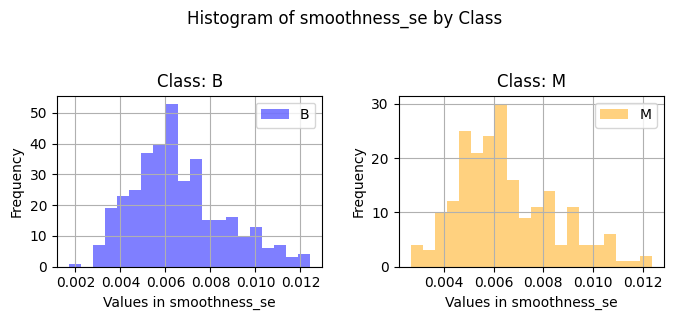

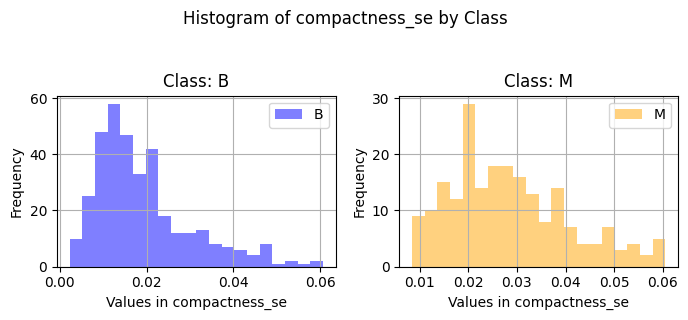

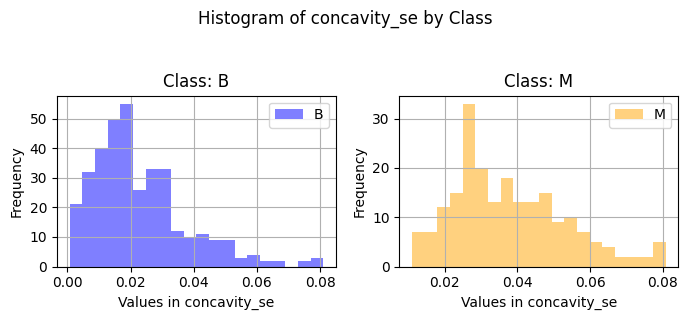

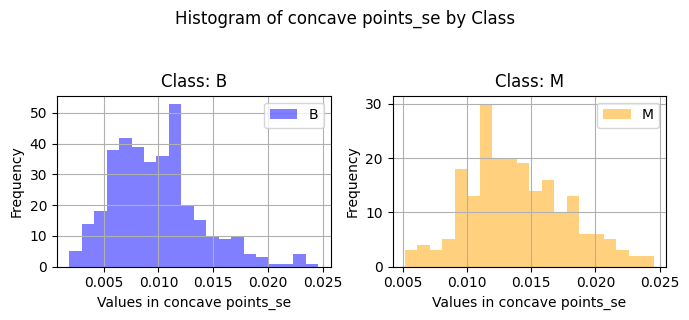

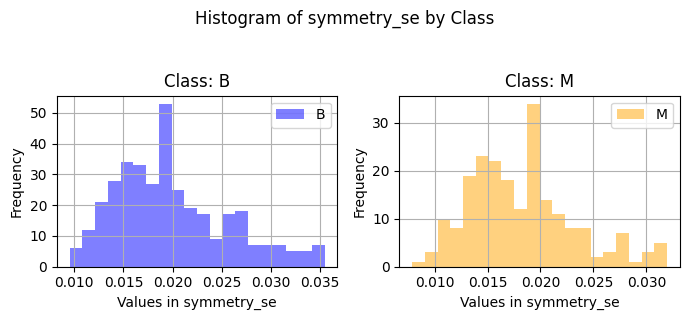

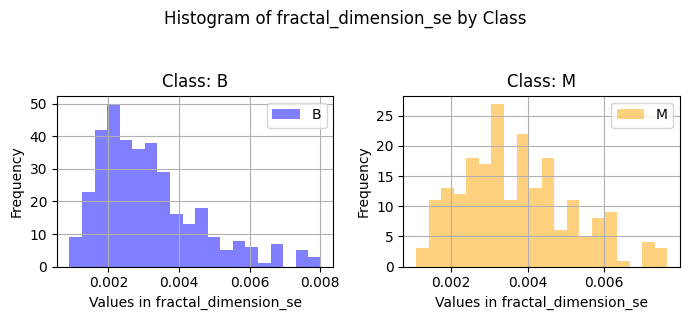

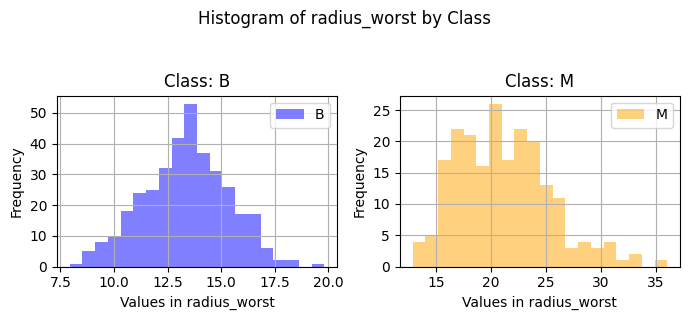

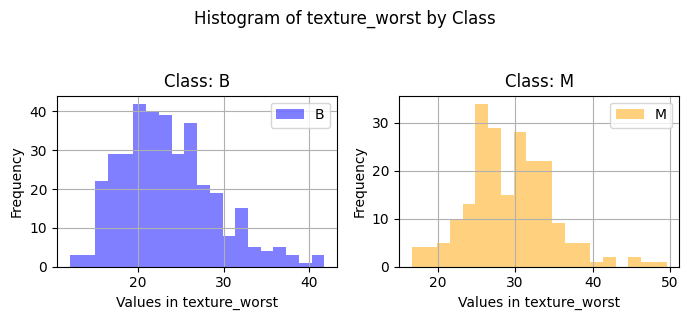

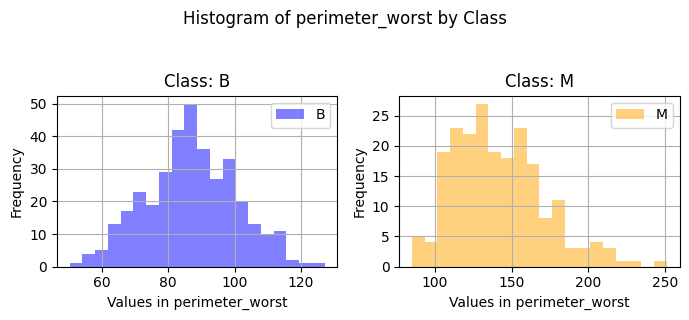

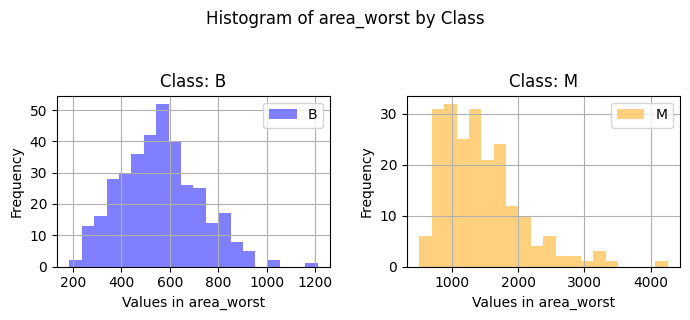

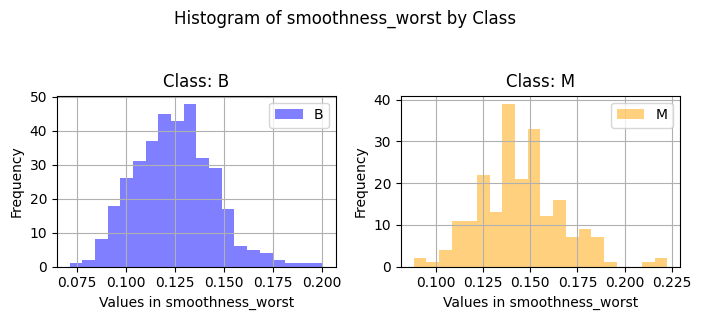

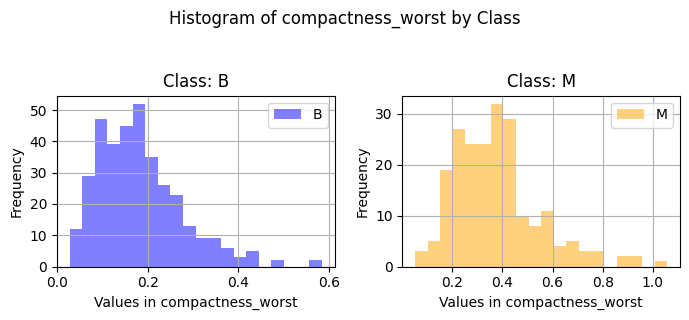

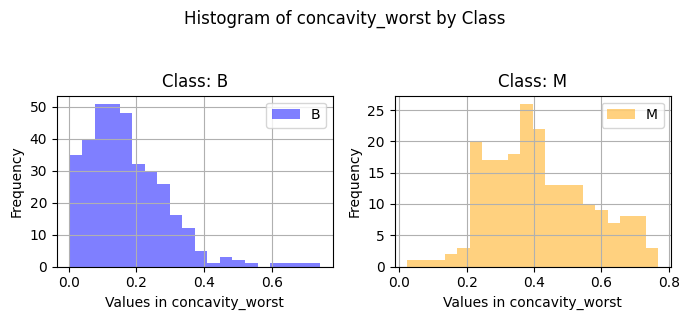

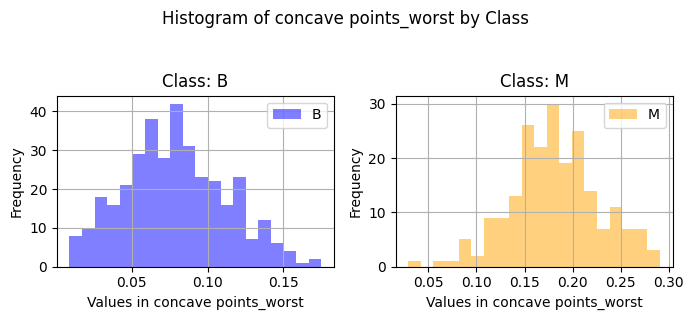

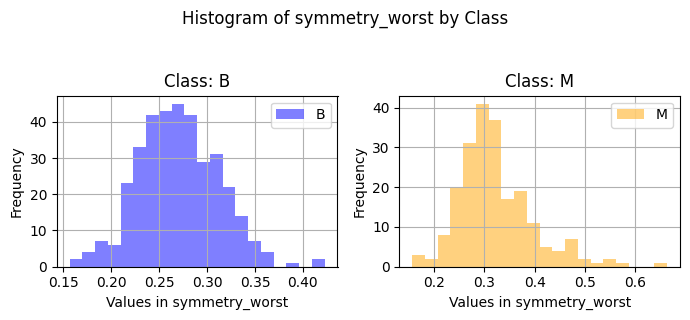

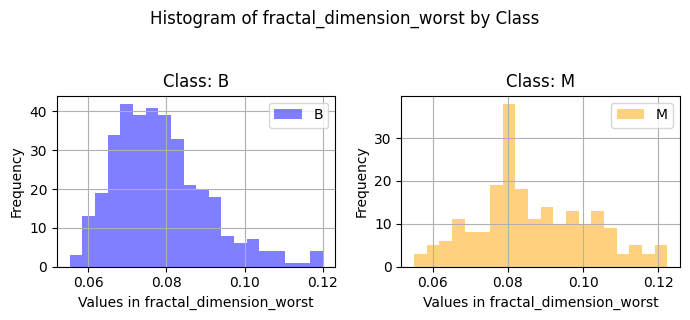

In [ ]:
class_column = data1.columns[1]
columns_to_visualize = data1.columns[2:]

colors = ['blue', 'orange']

for column in columns_to_visualize:
    fig, axs = plt.subplots(1, 2, figsize=(7, 3))
    fig.suptitle(f'Histogram of {column} by Class', y=1.05)

    for idx, (class_label, group) in enumerate(data1.groupby(class_column)):
        ax = axs[idx]

        ax.hist(group[column], bins=20, alpha=0.5, label=str(class_label), color=colors[idx])
        ax.set_xlabel(f'Values in {column}')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Class: {class_label}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


<ipython-input-19-05636a46b437>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data1.corr()


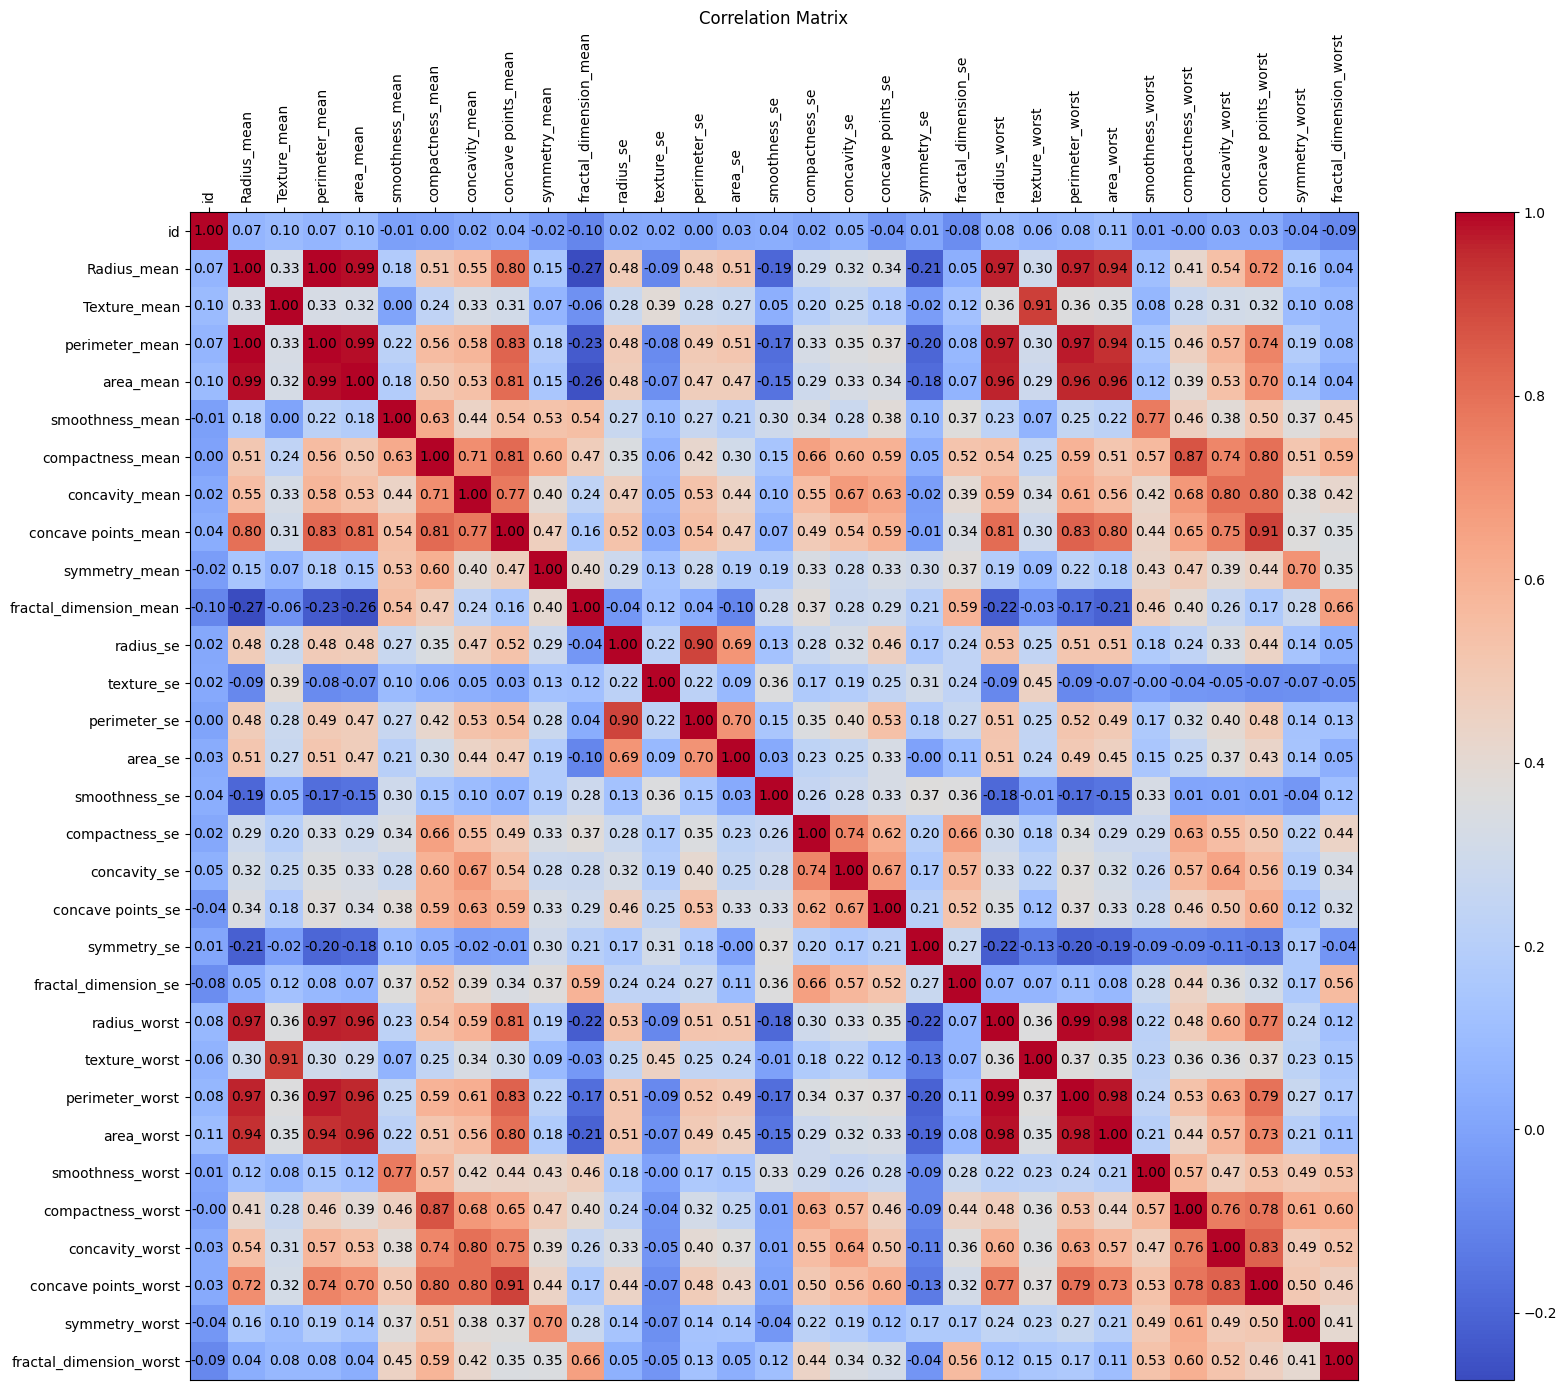

In [ ]:
corr_matrix = data1.corr()

plt.figure(figsize=(20, 14))

heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

plt.colorbar(heatmap)

plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.index)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


**Drop the First Column of the Dataset**

In [ ]:
dataset_after_drop_the_first_column = data1.drop(data1.columns[0], axis=1)

output_path = '/content/drive/MyDrive/Python Final Project/afterdrop_first_column_in_dataset.xlsx'

try:
    dataset_after_drop_the_first_column.to_excel(output_path, index=False)
    print("File saved successfully!")
except Exception as e:
    print(f"Error occurred: {str(e)}")
try:
    pd.read_excel(output_path)
    print("File read successfully!")
except Exception as e:
    print(f"Error occurred while reading the file: {str(e)}")

File saved successfully!
File read successfully!


In [ ]:
data2=pd.read_excel(output_path)


In [ ]:
X = data2.iloc[:, 1:]
y = data2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.9649122807017544
